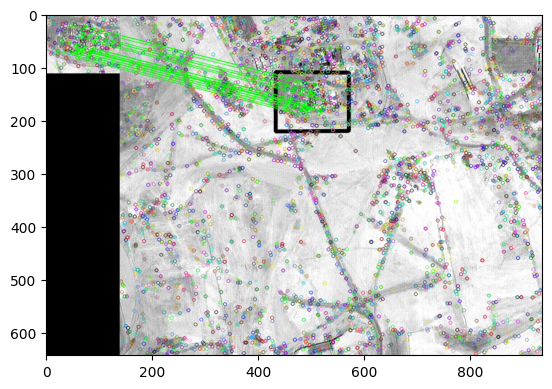

In [ ]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

# Load the images
img1 = cv.imread('/content/drive/MyDrive/EAFIT/2024-2/Visión por computadora/Ims/land0.jpg', cv.IMREAD_GRAYSCALE)          # queryImage
img2 = cv.imread('/content/drive/MyDrive/EAFIT/2024-2/Visión por computadora/Ims/src0.jpg', cv.IMREAD_GRAYSCALE) # trainImage

# Initiate SIFT detector
sift = cv.SIFT_create()

# Find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1, None)
kp2, des2 = sift.detectAndCompute(img2, None)

# FLANN parameters
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50)   # or pass empty dictionary

flann = cv.FlannBasedMatcher(index_params, search_params)
matches = flann.knnMatch(des1, des2, k=2)

# Need to draw only good matches, so create a mask
matchesMask = [[0, 0] for i in range(len(matches))]

# Ratio test as per Lowe's paper
good_matches = []
for i, (m, n) in enumerate(matches):
    if m.distance < 0.04 * n.distance:
        matchesMask[i] = [1, 0]
        good_matches.append(m)

# Find homography if enough good matches are found
if len(good_matches) > 10:
    src_pts = np.float32([kp1[m.queryIdx].pt for m in good_matches]).reshape(-1, 1, 2)
    dst_pts = np.float32([kp2[m.trainIdx].pt for m in good_matches]).reshape(-1, 1, 2)

    M, mask = cv.findHomography(src_pts, dst_pts, cv.RANSAC, 5.0)
    matchesMask = mask.ravel().tolist()

    # Draw bounding box
    h, w = img1.shape
    pts = np.float32([[0, 0], [0, h-1], [w-1, h-1], [w-1, 0]]).reshape(-1, 1, 2)
    dst = cv.perspectiveTransform(pts, M)

    img2 = cv.polylines(img2, [np.int32(dst)], True, (0, 255, 0), 5, cv.LINE_AA)

# Draw matches
draw_params = dict(matchColor = (0, 255, 0),  # Draw matches in green color
                   #singlePointColor = (0, 0, 0),
                   matchesMask = matchesMask,  # Draw only inliers
                   flags = cv.DrawMatchesFlags_DEFAULT)

img3 = cv.drawMatches(img1, kp1, img2, kp2, good_matches, None, **draw_params)

# Display the image
plt.imshow(img3)
plt.show()

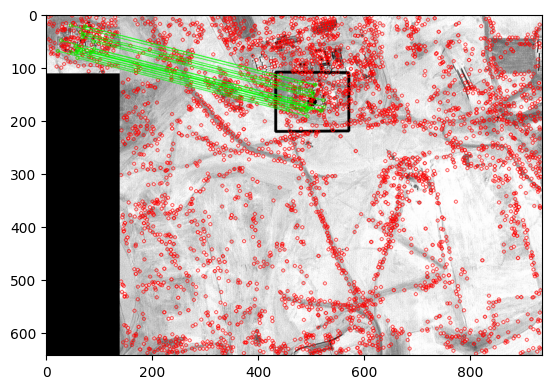

In [ ]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

# Load the images
img1 = cv.imread('/content/drive/MyDrive/EAFIT/2024-2/Visión por computadora/Ims/land0.jpg', cv.IMREAD_GRAYSCALE)          # queryImage
img2 = cv.imread('/content/drive/MyDrive/EAFIT/2024-2/Visión por computadora/Ims/src0.jpg', cv.IMREAD_GRAYSCALE) # trainImage

# Initiate SIFT detector
sift = cv.SIFT_create()

# Find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1, None)
kp2, des2 = sift.detectAndCompute(img2, None)

# FLANN parameters
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50)   # or pass empty dictionary

flann = cv.FlannBasedMatcher(index_params, search_params)
matches = flann.knnMatch(des1, des2, k=2)

# Need to draw only good matches, so create a mask
matchesMask = [[0, 0] for i in range(len(matches))]

# Ratio test as per Lowe's paper
good_matches = []
for i, (m, n) in enumerate(matches):
    if m.distance < 0.04 * n.distance:
        matchesMask[i] = [1, 0]
        good_matches.append(m)

# Find homography if enough good matches are found
if len(good_matches) > 10:
    src_pts = np.float32([kp1[m.queryIdx].pt for m in good_matches]).reshape(-1, 1, 2)
    dst_pts = np.float32([kp2[m.trainIdx].pt for m in good_matches]).reshape(-1, 1, 2)

    M, mask = cv.findHomography(src_pts, dst_pts, cv.RANSAC, 5.0)
    matchesMask = mask.ravel().tolist()

    # Draw bounding box in blue
    h, w = img1.shape
    pts = np.float32([[0, 0], [0, h-1], [w-1, h-1], [w-1, 0]]).reshape(-1, 1, 2)
    dst = cv.perspectiveTransform(pts, M)

    img2 = cv.polylines(img2, [np.int32(dst)], True, (0, 255, 0), 3, cv.LINE_AA)

    # Calculate the center of the bounding box
    center_x = int(np.mean(dst[:, 0, 0]))
    center_y = int(np.mean(dst[:, 0, 1]))

    # Draw a red point at the center
    img2 = cv.circle(img2, (center_x, center_y), 5, (0, 0, 255), 6, -1)

# Draw matches
draw_params = dict(matchColor = (0, 255, 0),  # Draw matches in green color
                   singlePointColor = (255, 0, 0),
                   matchesMask = matchesMask,  # Draw only inliers
                   flags = cv.DrawMatchesFlags_DEFAULT)

img3 = cv.drawMatches(img1, kp1, img2, kp2, good_matches, None, **draw_params)

# Display the image
plt.imshow(img3)
plt.show()

In [ ]:
 from google.colab.patches import cv2_imshow

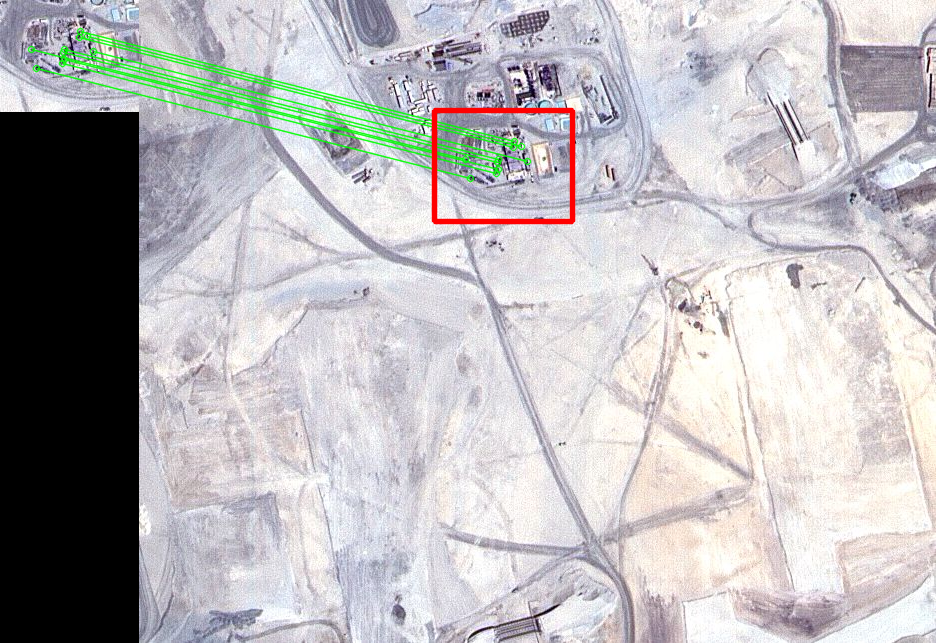

In [ ]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow # Import the correct function for Colab

img1 = cv.imread('/content/drive/MyDrive/EAFIT/2024-2/Visión por computadora/Ims/land0.jpg')# queryImage
img2 = cv.imread('/content/drive/MyDrive/EAFIT/2024-2/Visión por computadora/Ims/src0.jpg') # trainImage

# Initiate SIFT detector
orb = cv.ORB_create()

# find the keypoints and descriptors with ORB
kp1, des1 = orb.detectAndCompute(img1,None)
kp2, des2 = orb.detectAndCompute(img2,None)

# create BFMatcher object
bf = cv.BFMatcher(cv.NORM_HAMMING, crossCheck=True)

# Match descriptors.
matches = bf.match(des1,des2)

# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)

good_matches = matches[:10]

src_pts = np.float32([ kp1[m.queryIdx].pt for m in good_matches     ]).reshape(-1,1,2)
dst_pts = np.float32([ kp2[m.trainIdx].pt for m in good_matches ]).reshape(-1,1,2)
M, mask = cv.findHomography(src_pts, dst_pts, cv.RANSAC,5.0)
matchesMask = mask.ravel().tolist()
h,w = img1.shape[:2]
pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)

dst = cv.perspectiveTransform(pts,M)
dst += (w, 0)  # adding offset

# Draw bounding box in red
img3 = cv.polylines(img3, [np.int32(dst)], True, (0, 0, 255), 3, cv.LINE_AA)

# Calculate the center of the bounding box
center_x = int(np.mean(dst[:, 0, 0]))
center_y = int(np.mean(dst[:, 0, 1]))

# Draw a red point at the center of the bounding box
img3 = cv.circle(img3, (center_x, center_y), 5, (0, 0, 255), -1)


draw_params = dict(matchColor = (0,255,0), # draw matches in green color
               singlePointColor = (0,0,0),
               matchesMask = matchesMask, # draw only inliers
               flags = 2)

img3 = cv.drawMatches(img1,kp1,img2,kp2,good_matches, None,**draw_params)

# Draw bounding box in Red
img3 = cv.polylines(img3, [np.int32(dst)], True, (0,0,255),3, cv.LINE_AA)

# Use cv2_imshow instead of cv.imshow
cv2_imshow(img3) # Use the provided function from google.colab.patches to display the image
# cv.waitKey() is not needed in Colab
# or another option for display output
#plt.imshow(img3, 'result'), plt.show()

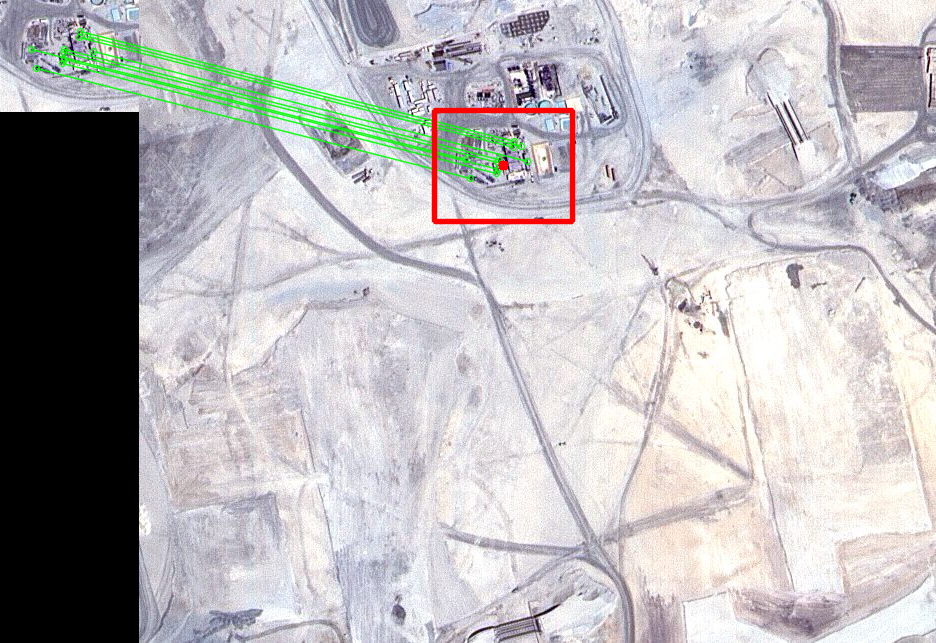

In [ ]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow  # Import the correct function for Colab

# Load the images
img1 = cv.imread('/content/drive/MyDrive/EAFIT/2024-2/Visión por computadora/Ims/land0.jpg')  # queryImage
img2 = cv.imread('/content/drive/MyDrive/EAFIT/2024-2/Visión por computadora/Ims/src0.jpg')   # trainImage

# Initiate ORB detector
orb = cv.ORB_create()

# Find the keypoints and descriptors with ORB
kp1, des1 = orb.detectAndCompute(img1, None)
kp2, des2 = orb.detectAndCompute(img2, None)

# Create BFMatcher object
bf = cv.BFMatcher(cv.NORM_HAMMING, crossCheck=True)

# Match descriptors
matches = bf.match(des1, des2)

# Sort them in the order of their distance
matches = sorted(matches, key=lambda x: x.distance)

# Select the top matches
good_matches = matches[:10]

# Extract points from the best matches
src_pts = np.float32([kp1[m.queryIdx].pt for m in good_matches]).reshape(-1, 1, 2)
dst_pts = np.float32([kp2[m.trainIdx].pt for m in good_matches]).reshape(-1, 1, 2)

# Find homography
M, mask = cv.findHomography(src_pts, dst_pts, cv.RANSAC, 5.0)
matchesMask = mask.ravel().tolist()

# Define the bounding box in the query image
h, w = img1.shape[:2]
pts = np.float32([[0, 0], [0, h-1], [w-1, h-1], [w-1, 0]]).reshape(-1, 1, 2)

# Transform the bounding box to the train image
dst = cv.perspectiveTransform(pts, M)

# Draw matches
draw_params = dict(matchColor=(0, 255, 0),  # draw matches in green color
                   singlePointColor=None,
                   matchesMask=matchesMask,  # draw only inliers
                   flags=2)

img3 = cv.drawMatches(img1, kp1, img2, kp2, good_matches, None, **draw_params)

# Draw bounding box in red on img2 within img3
for i in range(len(dst)):
    dst[i][0][0] += img1.shape[1]

img3 = cv.polylines(img3, [np.int32(dst)], True, (0, 0, 255), 3, cv.LINE_AA)

# Calculate the center of the bounding box
center_x = int(np.mean(dst[:, 0, 0]))
center_y = int(np.mean(dst[:, 0, 1]))

# Draw a red point at the center of the bounding box
img3 = cv.circle(img3, (center_x, center_y), 5, (0, 0, 255), -1)

# Display the result
cv2_imshow(img3)  # Use the provided function from google.colab.patches to display the image
